### NAMA  : SHELOMITA YOHELLIA
### NIM : 2209106019
### KELAS : A1 2022

# **KECERDASAN BUATAN**
# **POSTTEST 6**

#### Link Dataset : https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

#### Import library yang digunakan

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

#### Membuka file csv

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

#### Membuat variable shelom untuk membuat data menjadi 2000 record

In [3]:
shelom = df.sample(n=2000)
shelom.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4945562,351,PAYMENT,6005.64,C1411252150,0.0,0.0,M197969478,0.00,0.00,0,0
5551266,383,CASH_OUT,54205.29,C1341576909,0.0,0.0,C189830940,156518.52,210723.81,0,0
4005639,298,CASH_OUT,197048.50,C404021200,0.0,0.0,C1485864511,940801.47,1137849.97,0,0
4164398,304,TRANSFER,10000000.00,C1179115252,0.0,0.0,C1435016891,14191674.43,25371109.98,0,0
1848771,163,CASH_OUT,207547.75,C1806858178,0.0,0.0,C141316671,12271754.85,12479302.61,0,0


#### Prapemrosesan data

In [4]:
label_encoder = LabelEncoder()
shelom['type'] = label_encoder.fit_transform(shelom['type'])

C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [5]:
label_encoder = LabelEncoder()
shelom['nameOrig'] = label_encoder.fit_transform(shelom['nameOrig'])

C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [6]:
label_encoder = LabelEncoder()
shelom['nameDest'] = label_encoder.fit_transform(shelom['nameDest'])

C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


#### Pemisahan fitur X dan label y

In [7]:
X = shelom[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = shelom['isFraud']

####  Normalisasi data jika variabel-variabel memiliki rentang nilai yang besar.

In [8]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Shelom\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be rem

#### Pisahkan data menjadi data latih dan data uji

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

#### Membuat model Sequential

In [10]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#### Compile model 

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Latih Model

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 3s 23ms/step - loss: 0.6167 - accuracy: 0.9031 - val_loss: 0.5086 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4042 - accuracy: 1.0000 - val_loss: 0.2845 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1928 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0683 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 8/10
20/20 [=

#### Evaluasi model

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss\t\t: {loss}')
print(f'Accuracy\t: {accuracy}')

13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Loss		: 0.0023546081501990557
Accuracy	: 1.0


#### Grafik pergerakan metrik (akurasi/error)

Text(0.5, 1.0, 'Training and Validation Accuracy')

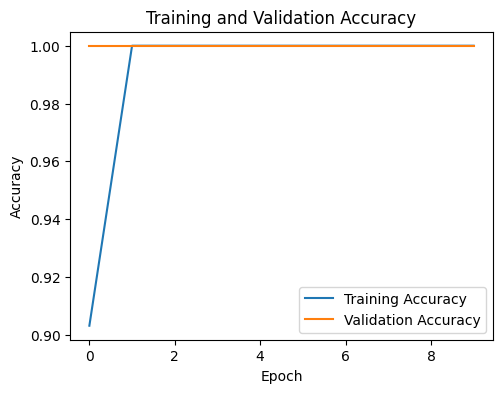

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

#### Grafik pergerakan metrik loss terhadap epoch

Text(0.5, 1.0, 'Training and Validation Loss')

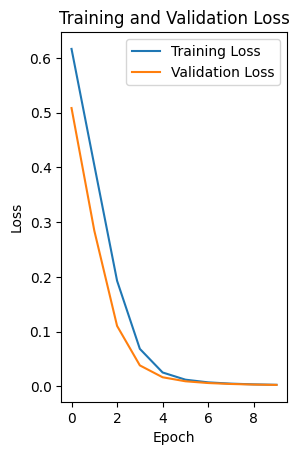

In [19]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')